# Exploration of Flights dataset
#### by Jérôme d'Harveng

<a id='table'></a>
## Table of Contents
<ul>
<li><a href="#univariate">Univariate exploration</a></li>
<li><a href="#multivariate">Multivariate exploration</a></li>
<li><a href="#feature_engineering">Feature Engineering</a></li>
<li><a href="#feature_selection">Feature selection</a></li>

## Loading dataset

In [1]:
# starting by import the required libraries
import numpy as np
import random
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
df_flights =  pd.read_csv('df_flights_clean_JDH.csv', sep=",", encoding='utf_8', low_memory=False)

In [3]:
print(df_flights.shape)
df_flights.sample(5)

(5622168, 34)


,YEAR,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,FL_DATE,UNIQUE_CARRIER,TAIL_NUM,FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN,...,DIVERTED,AIR_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,DEP_HOUR,ARR_HOUR
2047739,2016,5,28,6,2016-05-28,WN,N750SA,2528,14057,PDX,...,0,77,543,0,0,0,0,0,18,20
3015993,2016,7,6,3,2016-07-06,B6,N959JB,1184,13204,MCO,...,0,127,944,0,0,0,0,0,14,17
224887,2016,1,3,7,2016-01-03,DL,N993DL,1519,11193,CVG,...,0,126,879,0,0,0,0,0,9,12
683095,2016,2,13,6,2016-02-13,DL,N391DA,1558,12892,LAX,...,0,221,2158,0,0,0,0,0,10,18
1050780,2016,3,17,4,2016-03-17,WN,N8609A,1833,15304,TPA,...,0,140,997,0,0,0,0,0,16,18


In [4]:
# Separatingt the data in non CANCELLED and CANCELLED flights
df_non_cancelled = df_flights.query('CANCELLED ==0')
df_cancelled = df_flights.query('CANCELLED ==1')

In [5]:
print(df_non_cancelled.shape)
print(df_cancelled.shape)

(5556195, 34)
(65973, 34)


In [6]:
print(df_flights.columns.values.tolist())

['YEAR', 'MONTH', 'DAY_OF_MONTH', 'DAY_OF_WEEK', 'FL_DATE', 'UNIQUE_CARRIER', 'TAIL_NUM', 'FL_NUM', 'ORIGIN_AIRPORT_ID', 'ORIGIN', 'ORIGIN_STATE_ABR', 'DEST_AIRPORT_ID', 'DEST', 'DEST_STATE_ABR', 'CRS_DEP_TIME', 'DEP_DELAY', 'TAXI_OUT', 'WHEELS_OFF', 'WHEELS_ON', 'TAXI_IN', 'CRS_ARR_TIME', 'ARR_DELAY', 'CANCELLED', 'CANCELLATION_CODE', 'DIVERTED', 'AIR_TIME', 'DISTANCE', 'CARRIER_DELAY', 'WEATHER_DELAY', 'NAS_DELAY', 'SECURITY_DELAY', 'LATE_AIRCRAFT_DELAY', 'DEP_HOUR', 'ARR_HOUR']


<a id='univariate'></a>
## Univariate Exploration

### What's the percentage of cancelled flights?

In [7]:
(df_cancelled.shape[0]/df_flights.shape[0])*100

1.1734441233346282

### At what time are planes leaving?

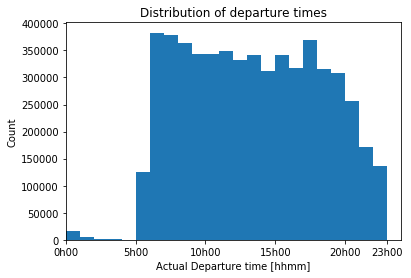

In [8]:
binsize = 100
bins = np.arange(0, 2400, binsize)
# We only look the DepTime for the flights that weren't cancelled
plt.hist(data = df_non_cancelled, x = 'CRS_DEP_TIME', bins = bins)
plt.xlim(0,2400)
xticks = [0,500,1000,1500,2000,2300]
xlabels = ['0h00','5h00','10h00','15h00','20h00','23h00']
plt.xticks(xticks,xlabels)
plt.xlabel('Actual Departure time [hhmm]')
plt.ylabel('Count')
plt.title('Distribution of departure times');

In [9]:
df_non_cancelled.CRS_DEP_TIME.describe()

count    5.556195e+06
mean     1.330303e+03
std      4.893090e+02
min      1.000000e+00
25%      9.150000e+02
50%      1.325000e+03
75%      1.735000e+03
max      2.359000e+03
Name: CRS_DEP_TIME, dtype: float64

> We observe that most planes leave between 5am and 11pm

### What are general distances for flights in this database?

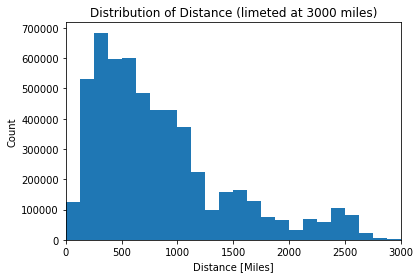

In [10]:
binsize = 125
bins = np.arange(0,3000+binsize, binsize)
plt.hist(data=df_non_cancelled,x='DISTANCE',bins=bins)
plt.xlim(0,3000)
plt.xlabel('Distance [Miles]')
plt.ylabel('Count')
plt.title('Distribution of Distance (limeted at 3000 miles)');

In [11]:
df_non_cancelled.DISTANCE.describe()

count    5.556195e+06
mean     8.494593e+02
std      6.188825e+02
min      2.800000e+01
25%      3.910000e+02
50%      6.780000e+02
75%      1.091000e+03
max      4.983000e+03
Name: DISTANCE, dtype: float64

> For non-cancelled flights: The mean distance is 618 miles, 50% of the flights are smaller than 678 miles.

### What is the distribution of DEP_DELAY?

/usr/local/lib/python3.7/site-packages/matplotlib/pyplot.py:1442: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  ret = ax.set_xlim(*args, **kwargs)


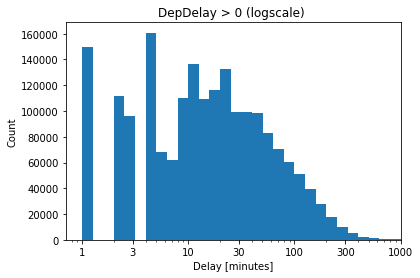

In [12]:
bins = 10**np.arange(0,3+0.1,0.1)
ticks = [1,3,10,30,100,300,1000]
labels = ['{}'.format(val) for val in ticks]
plt.hist(data = df_non_cancelled.query('DEP_DELAY>0'), x = 'DEP_DELAY', bins = bins)
plt.xscale('log')
plt.xlim(0,1000)
plt.xticks(ticks,labels)
plt.xlabel('Delay [minutes]')
plt.ylabel('Count')
plt.title('DepDelay > 0 (logscale) ');

In [13]:
df_non_cancelled.query('DEP_DELAY>0').DEP_DELAY.describe()

count    1.922479e+06
mean     3.423113e+01
std      5.952431e+01
min      1.000000e+00
25%      5.000000e+00
50%      1.400000e+01
75%      3.900000e+01
max      2.149000e+03
Name: DEP_DELAY, dtype: float64

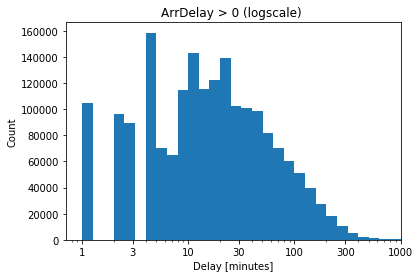

In [14]:
bins = 10**np.arange(0,3+0.1,0.1)
ticks = [1,3,10,30,100,300,1000]
labels = ['{}'.format(val) for val in ticks]
plt.hist(data = df_non_cancelled.query('ARR_DELAY>0'), x = 'ARR_DELAY', bins = bins)
plt.xscale('log')
plt.xlim(0,1000)
plt.xticks(ticks,labels)
plt.xlabel('Delay [minutes]')
plt.ylabel('Count')
plt.title('ArrDelay > 0 (logscale) ');

In [15]:
df_non_cancelled.query('ARR_DELAY>0').ARR_DELAY.describe()

count    1.890512e+06
mean     3.488137e+01
std      5.944662e+01
min      1.000000e+00
25%      6.000000e+00
50%      1.500000e+01
75%      3.900000e+01
max      2.142000e+03
Name: ARR_DELAY, dtype: float64

### What is the distribution AIR_TIME?

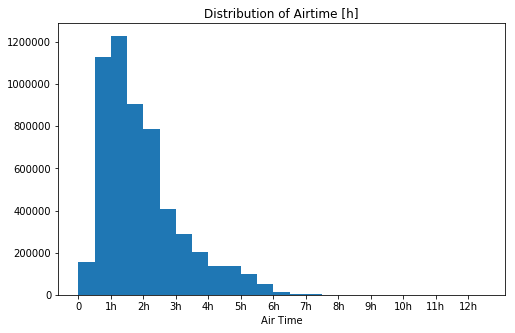

In [16]:
plt.figure(figsize = [8,5])
binsize = 30
bins = np.arange(0, df_non_cancelled.AIR_TIME.max()+binsize, binsize)
plt.hist(data = df_non_cancelled, x = 'AIR_TIME', bins = bins)
xticks = [0,60,120,180,240,300,360,420,480,540,600,660,720]
xlabels = ['0','1h','2h','3h','4h','5h','6h','7h','8h','9h','10h','11h','12h']
plt.xticks(xticks,xlabels)
#plt.xlim([0,11])
plt.xlabel('Air Time')
plt.title('Distribution of Airtime [h]');

In [17]:
df_non_cancelled.AIR_TIME.describe()

count    5.556195e+06
mean     1.163190e+02
std      7.339278e+01
min      4.000000e+00
25%      6.200000e+01
50%      9.700000e+01
75%      1.480000e+02
max      7.230000e+02
Name: AIR_TIME, dtype: float64

### Repartion of flights compared to UNIQUE_CARRIER

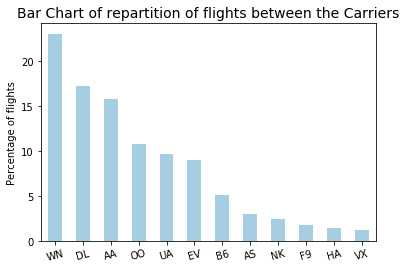

In [25]:
carrier_distr = df_flights.groupby('UNIQUE_CARRIER').count().DEP_DELAY
tot_flights = df_flights.shape[0]
rel_carrier_distr = (carrier_distr.divide(tot_flights))*100
rel_carrier_distr.sort_values(ascending=False).plot(x='index',y='count',kind='bar',colormap='Paired')
plt.xticks(rotation = 15)
plt.xlabel("")
plt.ylabel("Percentage of flights")
plt.title('Bar Chart of repartition of flights between the Carriers',fontsize=14);

### What is the most recurrent reason for cancellation?

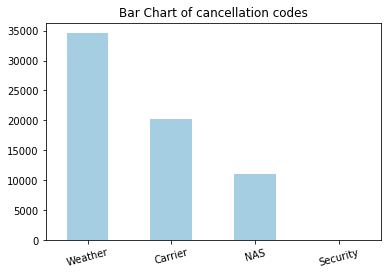

In [18]:
df_cancell_code = df_cancelled.groupby('CANCELLATION_CODE').count().DEP_DELAY
new_index = ['Carrier','Weather','NAS','Security']
df_cancell_code.index = new_index
df_cancell_code.sort_values(ascending=False).plot(x='index',y='count',kind='bar',colormap='Paired')
plt.xticks(rotation = 15)
plt.title('Bar Chart of cancellation codes');

> Most cancellations are related to Weather conditions and luckily only 26 flights were cancelled for Security reasons.

### When are most flights cancelled?

##### Relative  compared to Total amount of CANCELLED flights

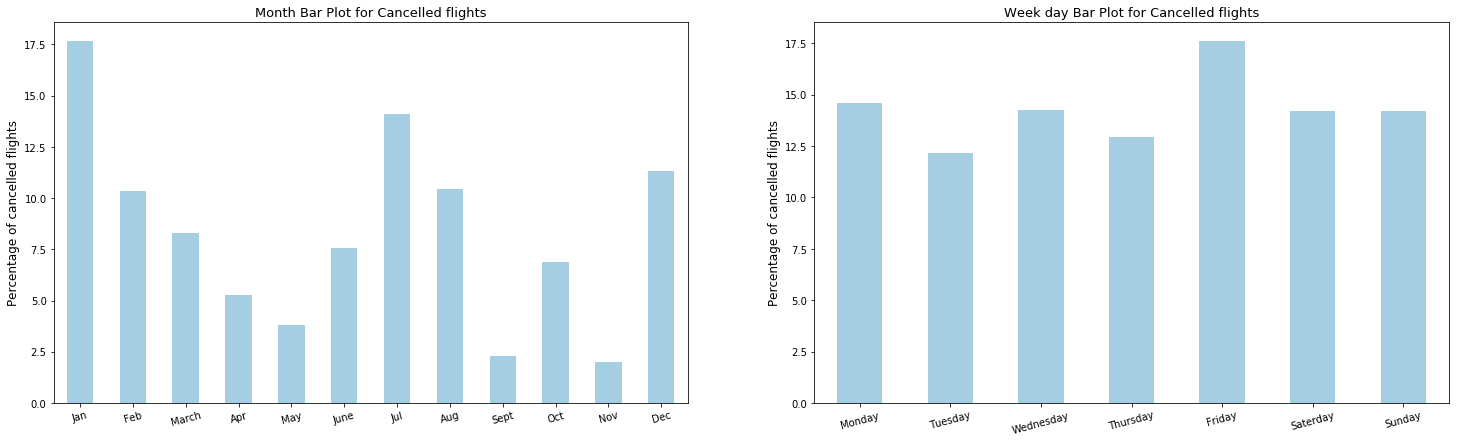

In [19]:
tot_cancelled = df_cancelled.shape[0]
plt.figure(figsize = [25,7])
# Month
plt.subplot(1,2,1)
month_index = ['Jan','Feb','March','Apr','May','June','Jul','Aug','Sept','Oct','Nov','Dec']
data_month = df_cancelled.groupby('MONTH').count().DEP_DELAY
data_mth_Rel = data_month.divide(tot_cancelled)*100
data_mth_Rel.index = month_index
data_mth_Rel.plot(x='index', y='count', kind='bar', colormap='Paired')
plt.title('Month Bar Plot for Cancelled flights',fontsize=13)
plt.xticks(rotation = 15)
plt.ylabel('Percentage of cancelled flights',fontsize=12);

# DayOfWeek
plt.subplot(1,2,2)
week_index = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saterday','Sunday']
data_week = df_cancelled.groupby('DAY_OF_WEEK').count().DEP_DELAY
data_wk_Rel = data_week.divide(tot_cancelled)*100
data_wk_Rel.index = week_index
data_wk_Rel.plot(x='index', y='count', kind='bar', colormap='Paired')
plt.title('Week day Bar Plot for Cancelled flights',fontsize=13)
plt.xticks(rotation = 15)
plt.ylabel('Percentage of cancelled flights',fontsize=12);

##### Relative compared to total amount of flights (that month or day_of_week)

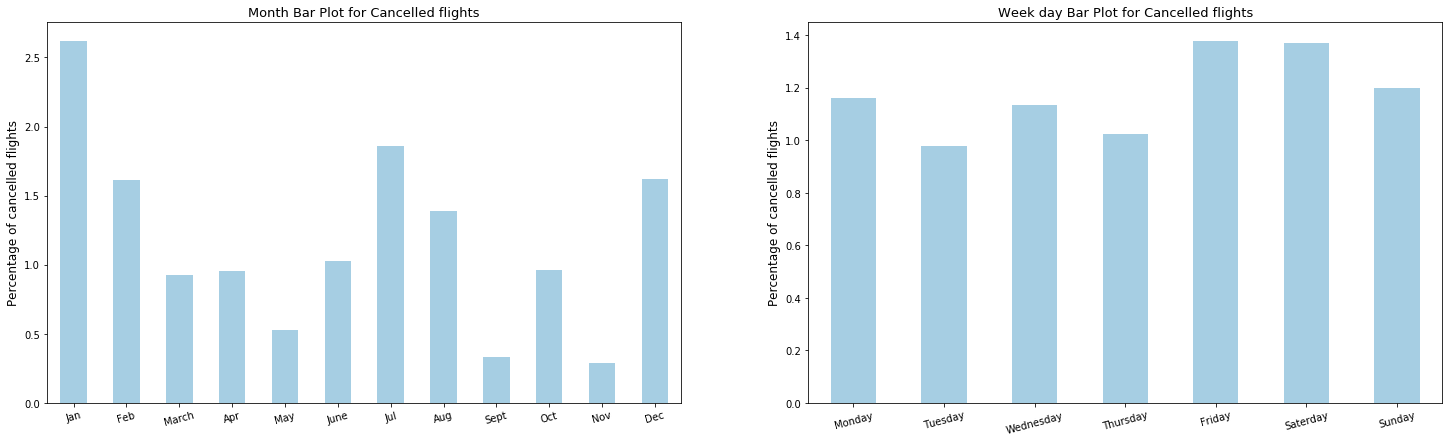

In [20]:
plt.figure(figsize = [25,7])
# Month
plt.subplot(1,2,1)
month_index = ['Jan','Feb','March','Apr','May','June','Jul','Aug','Sept','Oct','Nov','Dec']
data_month = df_cancelled.groupby('MONTH').count().DEP_DELAY
data_mth_tot = df_flights.groupby('MONTH').count().DEP_DELAY
data_mth_Rel = data_month.divide(data_mth_tot)*100
data_mth_Rel.index = month_index
data_mth_Rel.plot(x='index', y='count', kind='bar', colormap='Paired')
plt.title('Month Bar Plot for Cancelled flights',fontsize=13)
plt.xticks(rotation = 15)
plt.ylabel('Percentage of cancelled flights',fontsize=12);

# DayOfWeek
plt.subplot(1,2,2)
week_index = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saterday','Sunday']
data_week = df_cancelled.groupby('DAY_OF_WEEK').count().DEP_DELAY
data_wk_tot = df_flights.groupby('DAY_OF_WEEK').count().DEP_DELAY
data_wk_Rel = data_week.divide(data_wk_tot)*100
data_wk_Rel.index = week_index
data_wk_Rel.plot(x='index', y='count', kind='bar', colormap='Paired')
plt.title('Week day Bar Plot for Cancelled flights',fontsize=13)
plt.xticks(rotation = 15)
plt.ylabel('Percentage of cancelled flights',fontsize=12);

**Months**
> - Most fligtht cancellations happen in January and July
> - There are much less cancellations in September and November

**Week days**
> - Friday and Saturday seem to be more sensitive to cancellations
> - The other days seem to have more ore less similar types of cancellation rates

# Which Carriers have most cancellations?

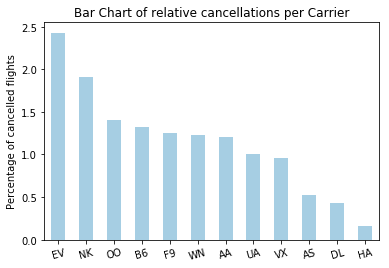

In [21]:
canc_carrier = df_cancelled.groupby('UNIQUE_CARRIER').count().DEP_DELAY
tot_carrier = df_flights.groupby('UNIQUE_CARRIER').count().DEP_DELAY
rel_canc_carrier = (canc_carrier.divide(tot_carrier))*100
rel_canc_carrier.sort_values(ascending=False).plot(x='index',y='count',kind='bar',colormap='Paired')
plt.xticks(rotation = 15)
plt.xlabel("")
plt.ylabel("Percentage of cancelled flights")
plt.title('Bar Chart of relative cancellations per Carrier');

### Which origins have most cancellations?

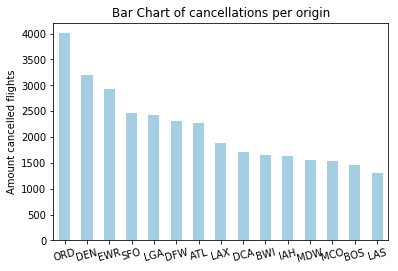

In [24]:
canc_origin = df_cancelled.groupby('ORIGIN').count().DEP_DELAY
canc_origin = canc_origin.sort_values(ascending=False).iloc[0:15]
canc_origin.plot(x='index',y='count',kind='bar',colormap='Paired')
plt.xticks(rotation = 15)
plt.xlabel("")
plt.ylabel("Amount cancelled flights")
plt.title('Bar Chart of cancellations per origin');

<a id='multivariate'></a>
## Multivariate Exploration
<a href="#table">back to content table</a>

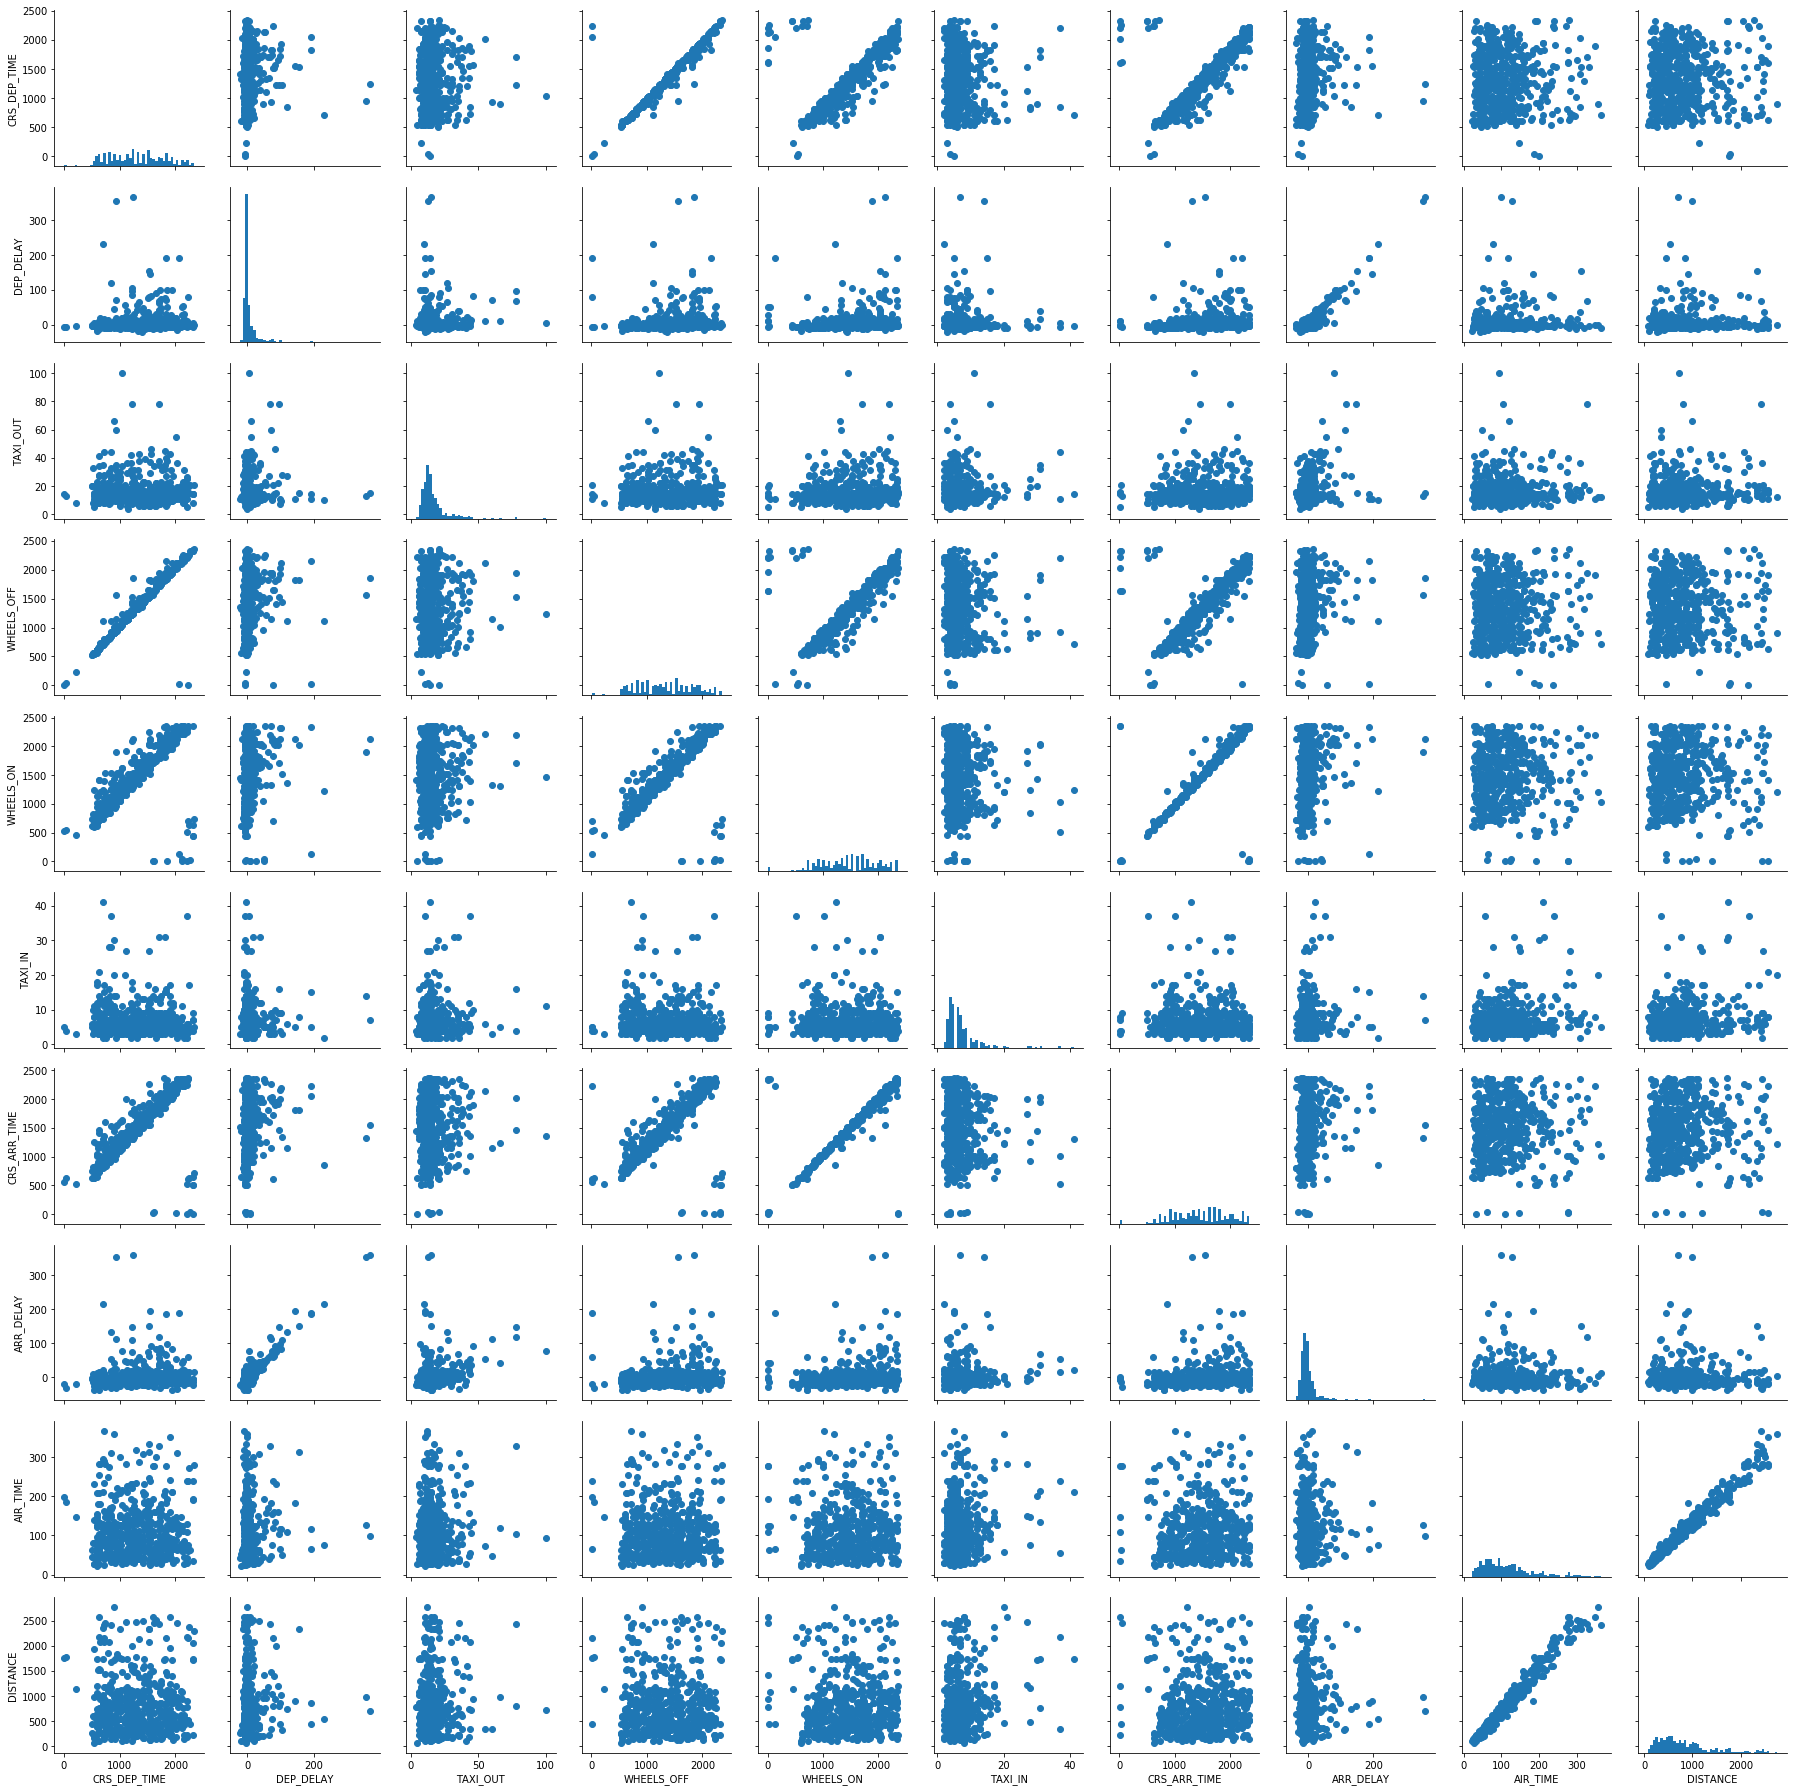

In [23]:
# plot matrix: sample 500 movies so that plots are clearer and
# they render faster
flight_scatter = ['CRS_DEP_TIME', 'DEP_DELAY', 'TAXI_OUT','WHEELS_OFF', 'WHEELS_ON', 'TAXI_IN', 
                  'CRS_ARR_TIME', 'ARR_DELAY','AIR_TIME', 'DISTANCE']
df_samp = df_non_cancelled.sample(500)

g = sb.PairGrid(data=df_samp, vars=flight_scatter)
g = g.map_diag(plt.hist,bins=50)
g.map_offdiag(plt.scatter);

### Average ARR_DELAY

#### Groupby: DAY_OF_WEEK

In [26]:
day_avg_delay = df_non_cancelled.groupby('DAY_OF_WEEK').mean().ARR_DELAY

In [27]:
# replacing index 0-7 with Monday till Sunday
day_avg_delay.index = week_index

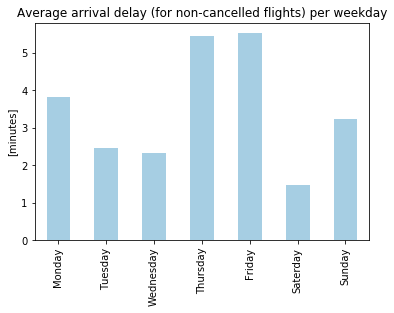

In [28]:
day_avg_delay.plot(kind='bar',colormap='Paired')
plt.title('Average arrival delay (for non-cancelled flights) per weekday')
plt.ylabel('[minutes]');

#### Groupby: MONTH

In [29]:
month_avg_delay = df_non_cancelled.groupby('MONTH').mean().ARR_DELAY

In [30]:
# replacing index 1-12 with January till December
month_avg_delay.index = month_index

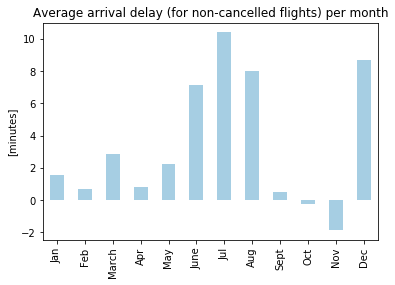

In [31]:
month_avg_delay.plot(kind='bar',colormap='Paired')
plt.title('Average arrival delay (for non-cancelled flights) per month')
plt.ylabel('[minutes]');

#### Groupby: UNIQUE_CARRIER

In [32]:
carrier_avg_delay = df_non_cancelled.groupby('UNIQUE_CARRIER').mean()
carrier_count_delay = df_flights.groupby('UNIQUE_CARRIER').count()

#### Find back the full carrier name

In [33]:
carrier_code = pd.read_csv("carriers.csv")

In [34]:
carrier_code.head(3)

,Code,Description
0,02Q,Titan Airways
1,04Q,Tradewind Aviation
2,05Q,"Comlux Aviation, AG"


In [35]:
def carrier_name(carr_abr):
    carr_full_name = []
    for i in carr_abr:
        carr_name = carrier_code.query('Code==@i').Description.values[0]
        carr_full_name.append(carr_name)
    return carr_full_name

In [36]:
carrier_count_sorted = carrier_count_delay.sort_values(by='ARR_DELAY',ascending=False).ARR_DELAY
carrier_avg_sorted = carrier_avg_delay.sort_values(by='ARR_DELAY',ascending=False).ARR_DELAY

In [37]:
# Apply carrier_name to find back 
index_carrier_count = carrier_name(carrier_count_sorted.index)
index_carrier_avg = carrier_name(carrier_avg_sorted.index)

In [38]:
# Changing the abreviations by the compagnie names
carrier_count_sorted.index = index_carrier_count
carrier_avg_sorted.index = index_carrier_avg

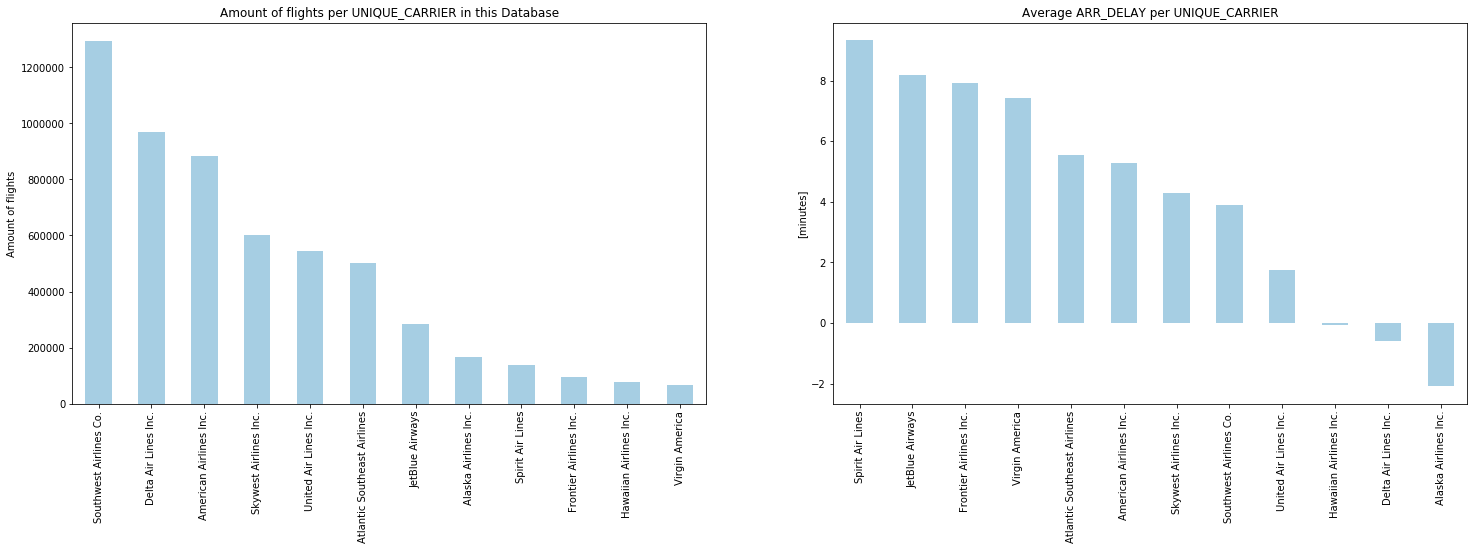

In [39]:
plt.figure(figsize = [25,7])
plt.subplot(1,2,1)
carrier_count_sorted.plot(kind='bar',colormap='Paired')
plt.title('Amount of flights per UNIQUE_CARRIER in this Database')
plt.ylabel('Amount of flights');

plt.subplot(1,2,2)
carrier_avg_sorted.plot(kind='bar',colormap='Paired')
plt.title('Average ARR_DELAY per UNIQUE_CARRIER')
plt.ylabel('[minutes]');

#### Groupby: 'ORIGIN_STATE_ABR'

In [40]:
state_avg_delay = df_non_cancelled.groupby('ORIGIN_STATE_ABR').mean()
state_count_delay = df_flights.groupby('ORIGIN_STATE_ABR').count()

In [41]:
state_avg_delay[['DEP_DELAY','CARRIER_DELAY','WEATHER_DELAY','NAS_DELAY','SECURITY_DELAY','LATE_AIRCRAFT_DELAY']].head(5)

,DEP_DELAY,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY
ORIGIN_STATE_ABR,,,,,,
AK,-1.561907,2.103281,0.252416,0.816027,0.049202,2.207238
AL,7.654781,3.697248,0.177082,2.157944,0.002377,4.581289
AR,7.186338,3.641458,0.401500,2.331887,0.000000,4.485433
AZ,7.116082,2.971578,0.216249,2.123066,0.028038,3.655953
CA,10.057769,3.297371,0.173589,2.511200,0.023541,5.347900


In [42]:
state_avg_delay.sort_values(by='ARR_DELAY',ascending=False).ARR_DELAY.head(5)

ORIGIN_STATE_ABR
TT    12.827869
WV     7.407013
IL     6.006539
VT     5.837688
CA     5.547287
Name: ARR_DELAY, dtype: float64

#### Find back State name

In [43]:
state_names = pd.read_csv('origin_states.csv')

In [44]:
state_names.columns = ['abreviation','state_name']

In [45]:
state_names.head(3)

,abreviation,state_name
0,AK,Alaska
1,AL,Alabama
2,AR,Arkansas


In [46]:
def state_name(state_abr):
    state_full_name = []
    for i in state_abr:
        state_name = state_names.query('abreviation==@i').state_name.values[0]
        state_full_name.append(state_name)
    return state_full_name

In [47]:
state_count_sorted = state_count_delay.sort_values(by='ARR_DELAY',ascending=False).ARR_DELAY
state_avg_sorted = state_avg_delay.sort_values(by='ARR_DELAY',ascending=False).ARR_DELAY

In [48]:
state_count_sorted.head(7)

ORIGIN_STATE_ABR
CA    723895
TX    581060
FL    448830
GA    409263
IL    341511
NY    253760
CO    247483
Name: ARR_DELAY, dtype: int64

In [49]:
# Apply carrier_name to find back 
index_state_count = state_name(state_count_sorted.index)
index_state_avg = state_name(state_avg_sorted.index)

In [50]:
# Changing the abreviations by the compagnie names
state_count_sorted.index = index_state_count
state_avg_sorted.index = index_state_avg

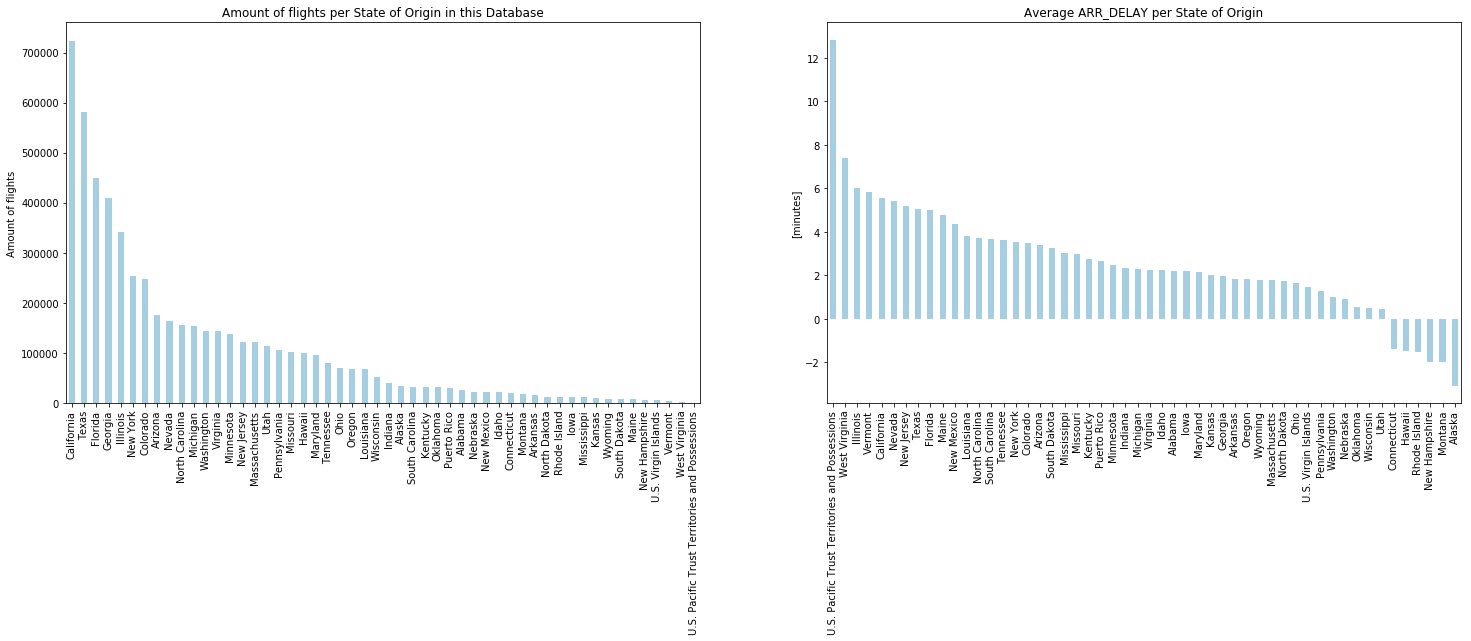

In [51]:
plt.figure(figsize = [25,7])
plt.subplot(1,2,1)
state_count_sorted.plot(kind='bar',colormap='Paired')
plt.title('Amount of flights per State of Origin in this Database')
plt.ylabel('Amount of flights');

plt.subplot(1,2,2)
state_avg_sorted.plot(kind='bar',colormap='Paired')
plt.title('Average ARR_DELAY per State of Origin')
plt.ylabel('[minutes]');

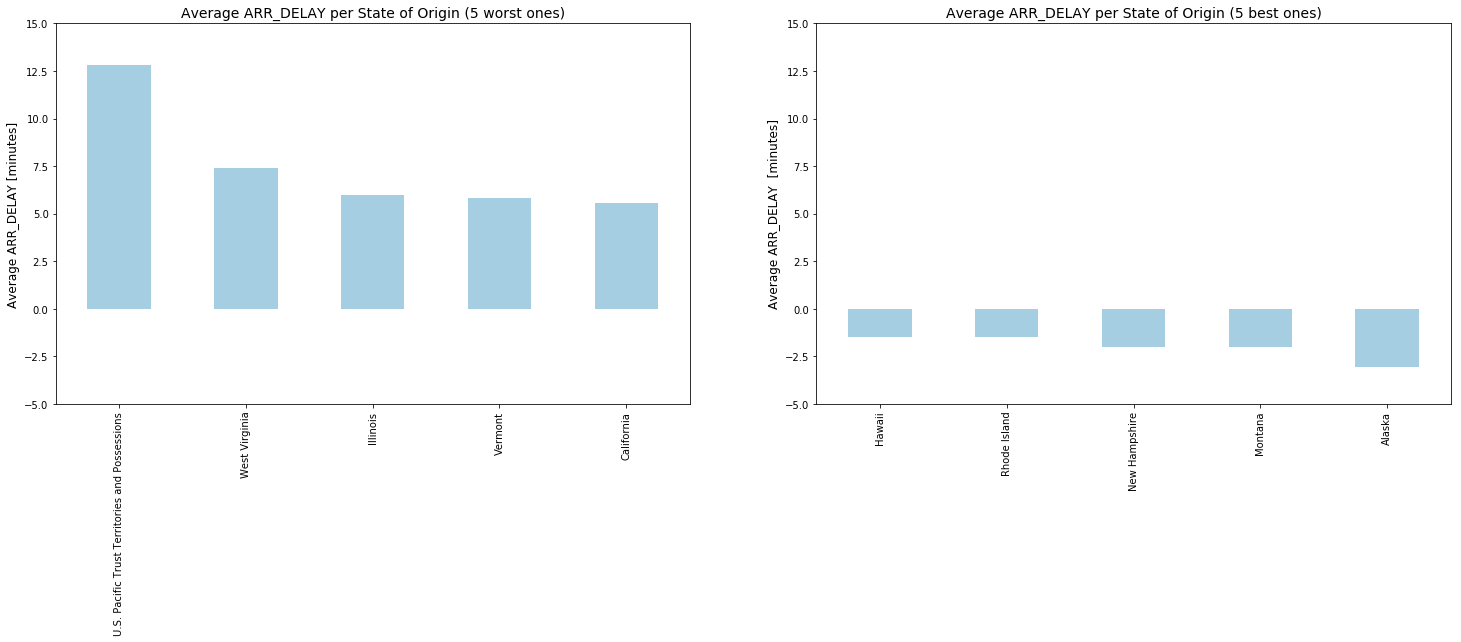

In [84]:
# For the presentation taking the 5 worst and 5 best ones
plt.figure(figsize = [25,7])
plt.subplot(1,2,1)
state_avg_sorted[:5].plot(kind='bar',colormap='Paired')
plt.ylim(-5,15)
plt.title('Average ARR_DELAY per State of Origin (5 worst ones)',fontsize=14)
plt.ylabel('Average ARR_DELAY [minutes]',fontsize=12);

plt.subplot(1,2,2)
state_avg_sorted[-5:].plot(kind='bar',colormap='Paired')
plt.ylim(-5,15)
plt.title('Average ARR_DELAY per State of Origin (5 best ones)',fontsize=14)
plt.ylabel('Average ARR_DELAY  [minutes]',fontsize=12);

#### Groupby: 'ORIGIN'

In [52]:
origin_avg_delay = df_non_cancelled.groupby('ORIGIN').mean()

In [53]:
origin_avg_delay[['DEP_DELAY','CARRIER_DELAY','WEATHER_DELAY','NAS_DELAY','SECURITY_DELAY','LATE_AIRCRAFT_DELAY']].head(5)

,DEP_DELAY,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY
ORIGIN,,,,,,
ABE,10.119520,4.454094,0.399504,2.684450,0.000000,5.044251
ABI,10.031847,1.910828,0.000000,2.025478,0.000000,9.968153
ABQ,7.973667,2.731354,0.451484,1.677891,0.034472,4.711139
ABR,5.878581,5.332879,0.087312,1.135061,0.054570,3.094134
ABY,7.697842,4.957862,0.000000,0.669065,0.000000,5.263104


In [54]:
origin_30 = origin_avg_delay.sort_values(by='ARR_DELAY',ascending=False).ARR_DELAY.iloc[:30]

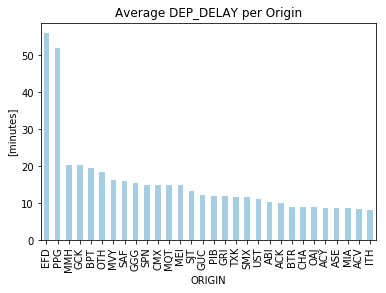

In [55]:
origin_30.plot(kind='bar',colormap='Paired')
plt.title('Average DEP_DELAY per Origin')
plt.ylabel('[minutes]');

### Scatterplots

In [56]:
data_sample = df_non_cancelled.sample(5000)

#### AIR_TIME vs DISTANCE

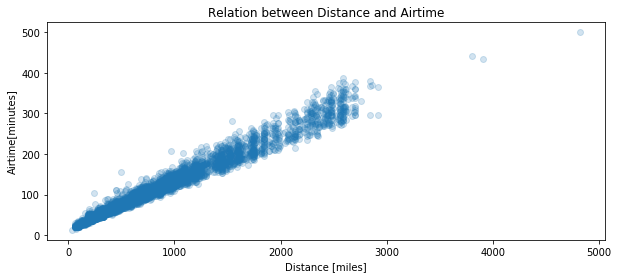

In [57]:
plt.figure(figsize = [10,4])
plt.scatter(data=data_sample,x='DISTANCE',y='AIR_TIME',alpha=1/5)
plt.title('Relation between Distance and Airtime')
plt.xlabel('Distance [miles]')
plt.ylabel('Airtime[minutes]');

#### ARR_DELAY vs CRS_DEP_TIME

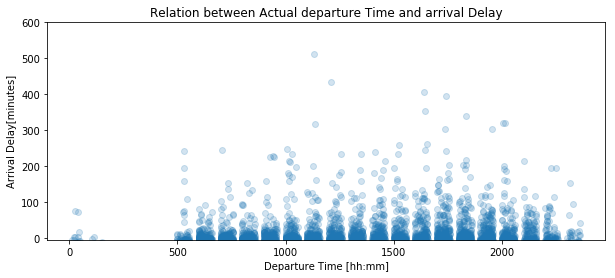

In [58]:
plt.figure(figsize = [10,4])
plt.scatter(data=data_sample,x='CRS_DEP_TIME',y='ARR_DELAY',alpha=1/5)
plt.title('Relation between Actual departure Time and arrival Delay')
plt.xlabel('Departure Time [hh:mm]')
plt.ylabel('Arrival Delay[minutes]')
plt.ylim([-5,600]);

#### ARR_DELAY vs TAXI_IN

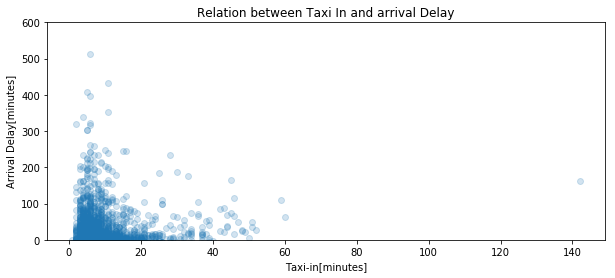

In [59]:
plt.figure(figsize = [10,4])
plt.scatter(data=data_sample,x='TAXI_IN',y='ARR_DELAY',alpha=1/5)
plt.title('Relation between Taxi In and arrival Delay')
plt.xlabel('Taxi-in[minutes]')
plt.ylabel('Arrival Delay[minutes]')
plt.ylim([0,600]);

#### ARR_DELAY vs TAXI_OUT

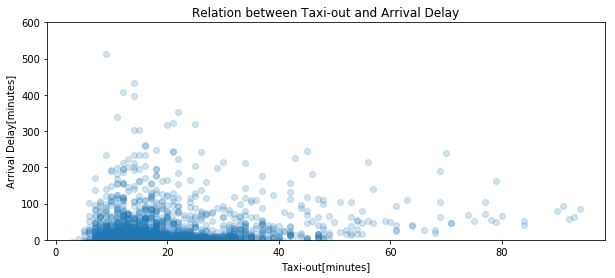

In [60]:
plt.figure(figsize = [10,4])
plt.scatter(data=data_sample,x='TAXI_OUT',y='ARR_DELAY',alpha=1/5)
plt.title('Relation between Taxi-out and Arrival Delay')
plt.xlabel('Taxi-out[minutes]')
plt.ylabel('Arrival Delay[minutes]')
plt.ylim([0,600]);

#### ARR_DELAY vs WHEELS_ON

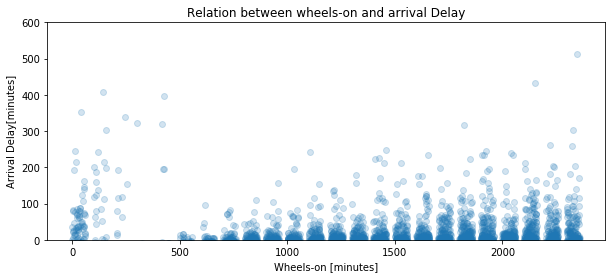

In [61]:
plt.figure(figsize = [10,4])
plt.scatter(data=data_sample,x='WHEELS_ON',y='ARR_DELAY',alpha=1/5)
plt.title('Relation between wheels-on and arrival Delay')
plt.xlabel('Wheels-on [minutes]')
plt.ylabel('Arrival Delay[minutes]')
plt.ylim([0,600]);

#### ARR_DELAY vs WHEELS_OFF

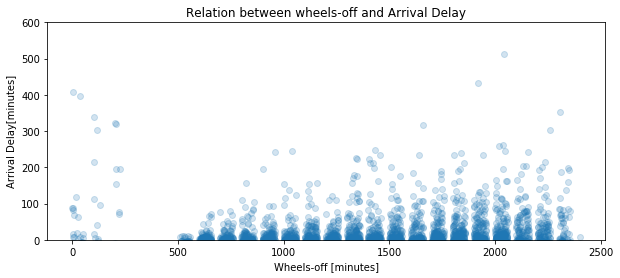

In [62]:
plt.figure(figsize = [10,4])
plt.scatter(data=data_sample,x='WHEELS_OFF',y='ARR_DELAY',alpha=1/5)
plt.title('Relation between wheels-off and Arrival Delay')
plt.xlabel('Wheels-off [minutes]')
plt.ylabel('Arrival Delay[minutes]')
plt.ylim([0,600]);

#### ARR_DELAY vs DISTANCE

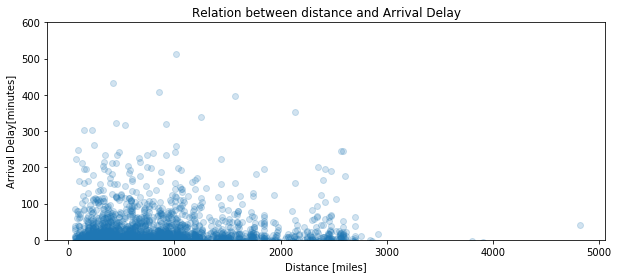

In [63]:
plt.figure(figsize = [10,4])
plt.scatter(data=data_sample,x='DISTANCE',y='ARR_DELAY',alpha=1/5)
plt.title('Relation between distance and Arrival Delay')
plt.xlabel('Distance [miles]')
plt.ylabel('Arrival Delay[minutes]')
plt.ylim([0,600]);

#### ARR_DELAY vs AIR_TIME

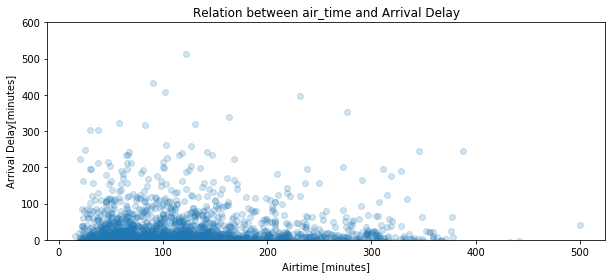

In [64]:
plt.figure(figsize = [10,4])
plt.scatter(data=data_sample,x='AIR_TIME',y='ARR_DELAY',alpha=1/5)
plt.title('Relation between air_time and Arrival Delay')
plt.xlabel('Airtime [minutes]')
plt.ylabel('Arrival Delay[minutes]')
plt.ylim([0,600]);

### Traject function

In [65]:
# need for the correspondance airport_id with airport names / cities
airport_id = pd.read_csv('airports_id.csv')

In [66]:
airport_id.head(2)

,Code,Description
0,10001,"Afognak Lake, AK: Afognak Lake Airport"
1,10003,"Granite Mountain, AK: Bear Creek Mining Strip"


In [67]:
df_non_cancelled.head(3)

,YEAR,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,FL_DATE,UNIQUE_CARRIER,TAIL_NUM,FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN,...,DIVERTED,AIR_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,DEP_HOUR,ARR_HOUR
0,2016,1,6,3,2016-01-06,AA,N4YBAA,43,11298,DFW,...,0,132,986,0,0,0,0,0,11,14
1,2016,1,7,4,2016-01-07,AA,N434AA,43,11298,DFW,...,0,126,986,0,0,0,0,0,11,14
2,2016,1,8,5,2016-01-08,AA,N541AA,43,11298,DFW,...,0,135,986,0,0,0,0,0,11,14


In [68]:
# Function returning list of airport codes linked to a city name given as input
def airport_codes(city):
    codes_airp = airport_id.query('Description.str.contains(@city)').Code.values
    if codes_airp.shape[0]==0:
        print( "Given city has no airport linked in the database")
        return [-999]
    else:
        return codes_airp

In [69]:
# Function returning main airport when given as input list of airport codes
def main_airport(code_list):
    if code_list.shape[0]==0:
        return "Empty list as input"
    else:
        principal_airport = df_non_cancelled.query('ORIGIN_AIRPORT_ID in @code_list')\
                                                    .groupby('ORIGIN_AIRPORT_ID').count().ORIGIN.idxmax()
        return principal_airport

In [70]:
# Function returning dataframe with all flights related to a specific route
# with as input : ID of departure airport and ID of arrival airport
def df_route(departure_id, arrival_id):
    routes = df_non_cancelled.query('(ORIGIN_AIRPORT_ID== @departure_id) & (DEST_AIRPORT_ID == @arrival_id)')
    if routes.shape[0] == 0:
        return "No such route in the database"
    else:
        return routes

In [87]:
# Function producing a Bar chart of average ARR_DELAY for a given route (linked to departure city - arrival city)
# and for a specific parameter
def route_delays(departure_city,arrival_city,x_variable):
    # finding back departure and arrival airport id's
    dep_codes = airport_codes(departure_city)
    arr_codes = airport_codes(arrival_city)
    
    if (dep_codes[0] == -999) or (arr_codes[0] == -999):
        return "One or Both of the entered cities isn't in the database"
    else:
        dep_main_code = main_airport(dep_codes)
        arr_main_code = main_airport(arr_codes)



        # find the df with routes linked 
        flight_routes = df_route(dep_main_code,arr_main_code)
        # grouped by x_variable => mean()
        grouped_flights = flight_routes.groupby(x_variable).mean().ARR_DELAY
        # plot
        #plt.figure(figsize = [10,5])
        grouped_flights.plot(kind='bar',colormap='Paired')
        plt.title(f'Average Arrival Delay {x_variable} for the route {departure_city} to {arrival_city}')
        plt.ylabel('Arrival Delay [minutes]')


[ 'MONTH', 'DAY_OF_MONTH', 'DAY_OF_WEEK', 'UNIQUE_CARRIER', 'TAIL_NUM', 'FL_NUM' 'CRS_DEP_TIME', 'CRS_ARR_TIME', 'ARR_DELAY']

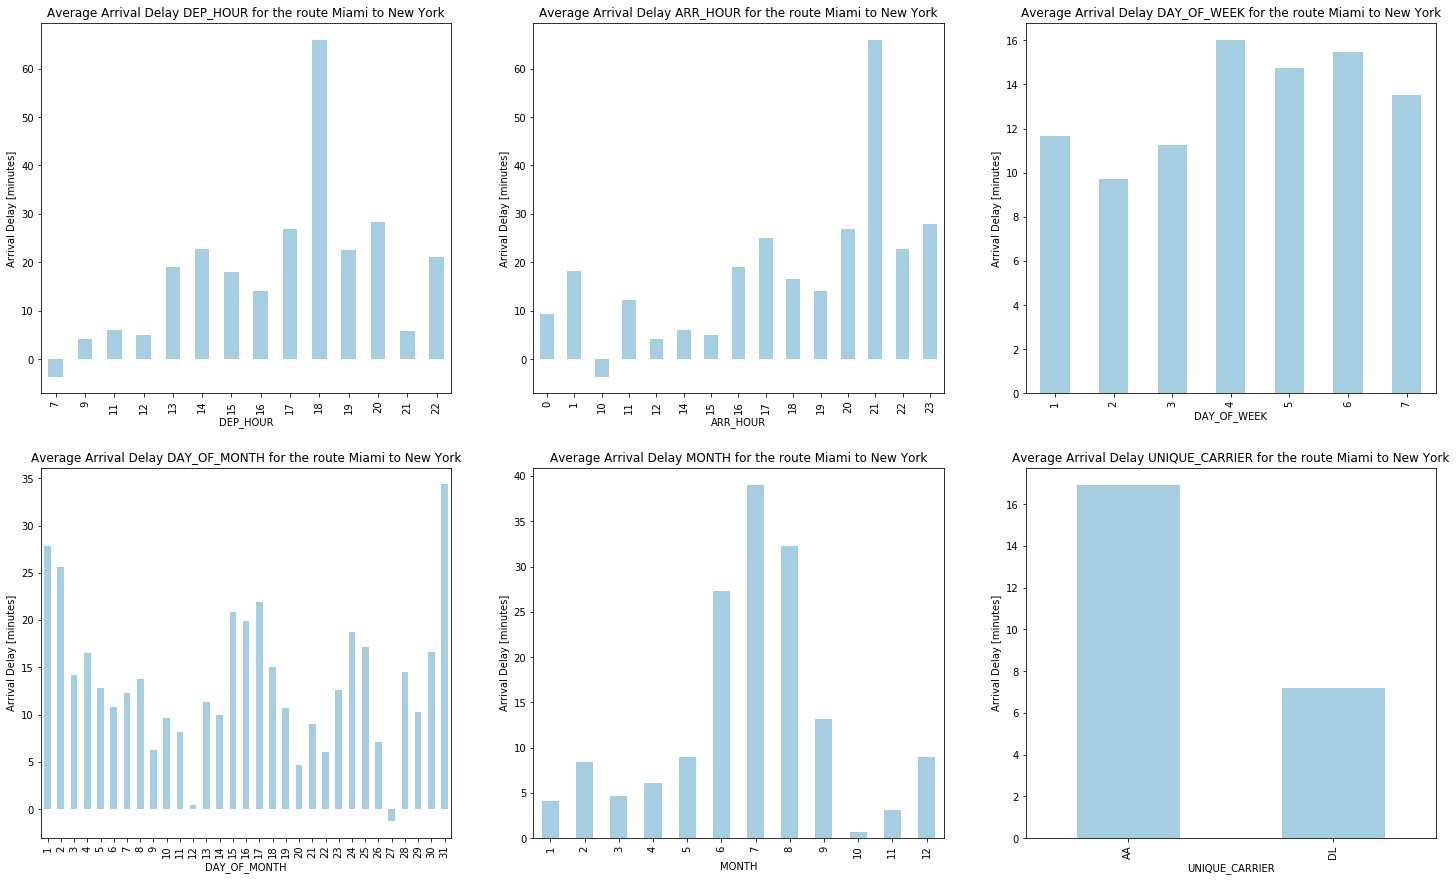

In [89]:
# For the presentation taking the 5 worst and 5 best ones
plt.figure(figsize = [25,15])
plt.subplot(2,3,1)
route_delays('Miami','New York','DEP_HOUR');

plt.subplot(2,3,2)
route_delays('Miami','New York','ARR_HOUR');

plt.subplot(2,3,3)
route_delays('Miami','New York','DAY_OF_WEEK');

plt.subplot(2,3,4)
route_delays('Miami','New York','DAY_OF_MONTH');

plt.subplot(2,3,5);
route_delays('Miami','New York','MONTH');

plt.subplot(2,3,6)
route_delays('Miami','New York','UNIQUE_CARRIER');

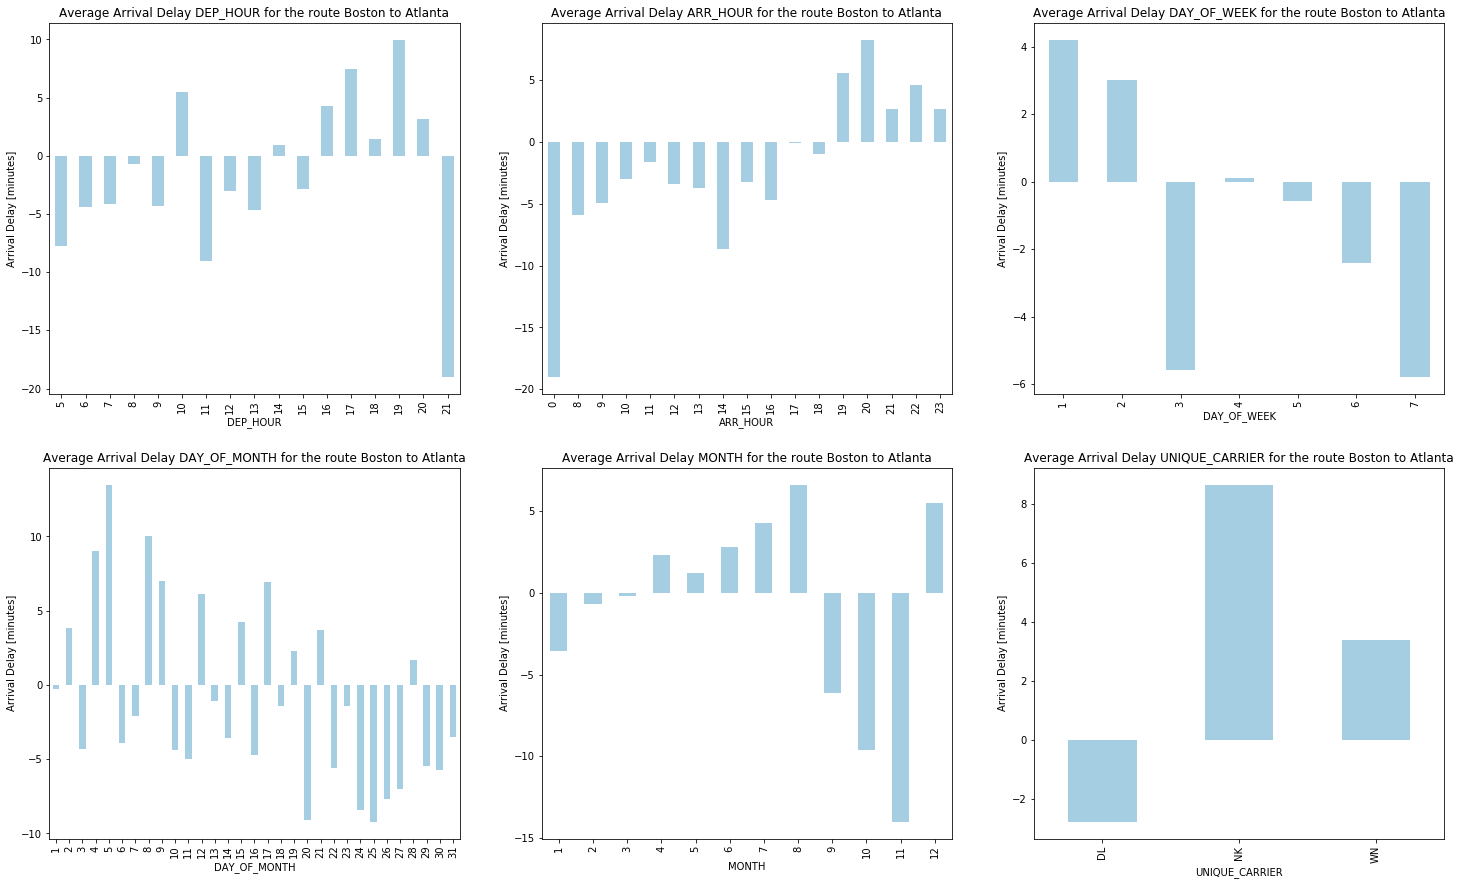

In [90]:
# For the presentation taking the 5 worst and 5 best ones
plt.figure(figsize = [25,15])
plt.subplot(2,3,1)
route_delays('Boston','Atlanta','DEP_HOUR');

plt.subplot(2,3,2)
route_delays('Boston','Atlanta','ARR_HOUR');

plt.subplot(2,3,3)
route_delays('Boston','Atlanta','DAY_OF_WEEK');

plt.subplot(2,3,4)
route_delays('Boston','Atlanta','DAY_OF_MONTH');

plt.subplot(2,3,5);
route_delays('Boston','Atlanta','MONTH');

plt.subplot(2,3,6)
route_delays('Boston','Atlanta','UNIQUE_CARRIER');

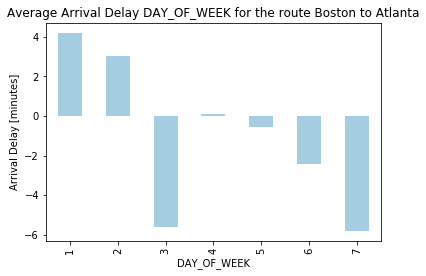

In [91]:
route_delays('Boston','Atlanta','DAY_OF_WEEK')

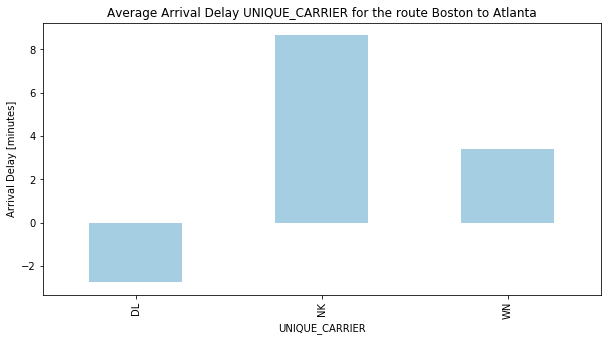

In [73]:
route_delays('Boston','Atlanta','UNIQUE_CARRIER')

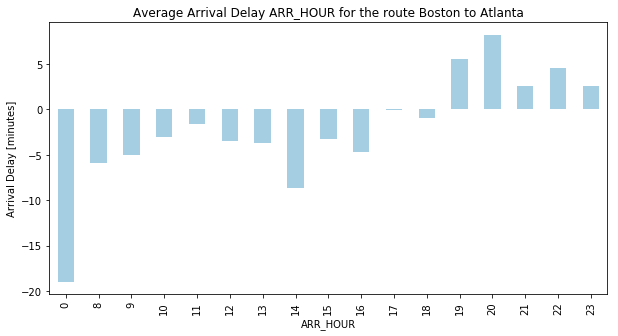

In [74]:
route_delays('Boston','Atlanta','ARR_HOUR')

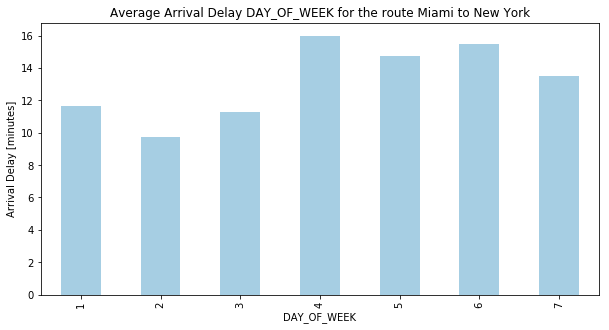

In [75]:
route_delays('Miami','New York','DAY_OF_WEEK')

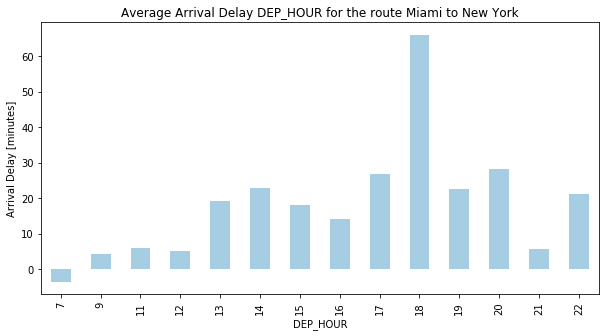

In [76]:
route_delays('Miami','New York','DEP_HOUR')

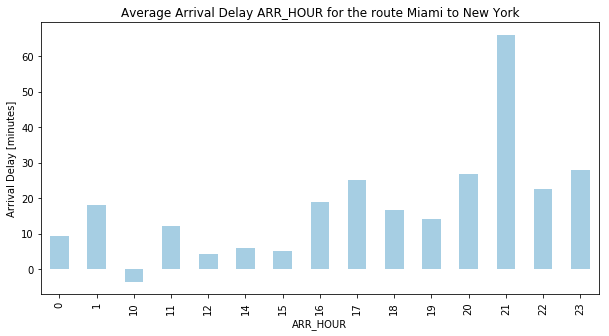

In [77]:
route_delays('Miami','New York','ARR_HOUR')

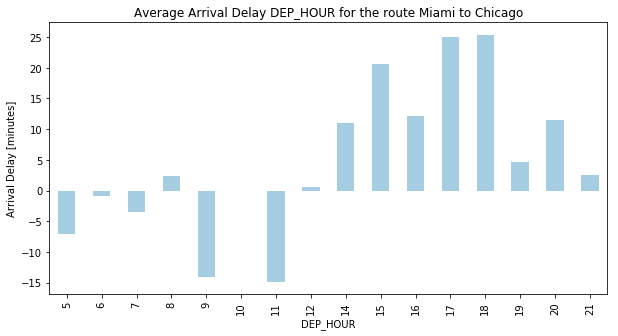

In [78]:
route_delays('Miami','Chicago','DEP_HOUR')

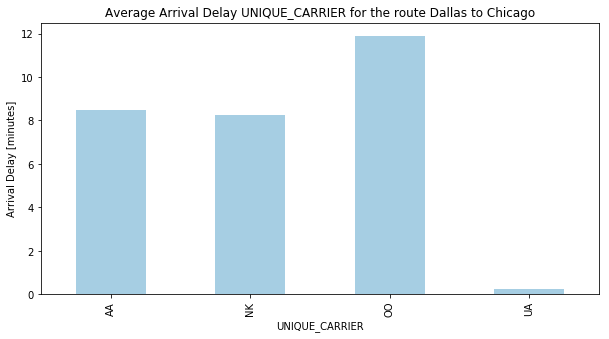

In [79]:
route_delays('Dallas','Chicago','UNIQUE_CARRIER')

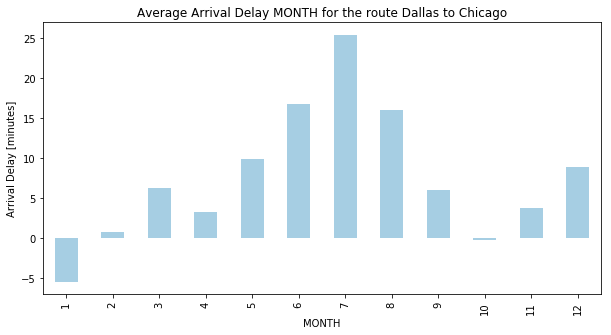

In [82]:
route_delays('Dallas','Chicago','MONTH')

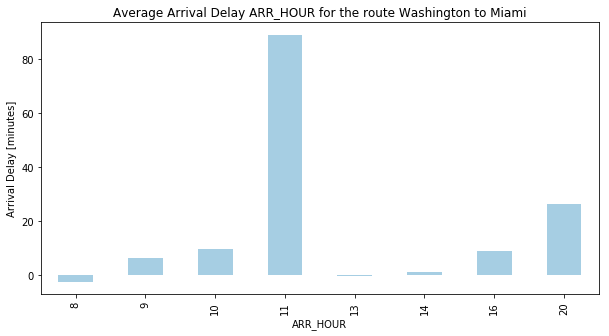

In [83]:
route_delays('Washington','Miami','ARR_HOUR')

In [101]:
# Prepa flight DF for Regressions
#df_flights_reg = df_flights[['MONTH', 'DAY_OF_MONTH', 'DAY_OF_WEEK','DEP_HOUR', 'ARR_HOUR', 'UNIQUE_CARRIER',
                             'ORIGIN_AIRPORT_ID', 'DEST_AIRPORT_ID','CRS_DEP_TIME','CRS_ARR_TIME','ARR_DELAY',
                             'AIR_TIME', 'DISTANCE']]

In [103]:
# export for regression 
#df_flights_reg.to_csv('df_flights_regression.csv', encoding='utf_8', index=False)